In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from easydict import EasyDict as edict

from lifelines import KaplanMeierFitter

from utils.config import cfg, cfg_from_file
from dataset_loader import load_data

In [18]:



args = edict({
    "cfg_file": './config/kidney/emd_cens_kidney.yml',
    "gpu_id": -1,
    "manual_seed": 1234,
})
cfg_from_file(args.cfg_file)

In [29]:
shuffled, _ = load_data(cfg)


Dataset kidney info:
Nb. col: 67
Nb unique t: 7299
Min t: 0.0
Max t: 21.356164383561644


In [28]:
unshuffled, _ = load_data(cfg)


Dataset kidney info:
Nb. col: 67
Nb unique t: 7299
Min t: 0.0
Max t: 21.356164383561644


In [31]:
unshuffled[:,0].mean(), shuffled[:,0].mean()

(5.898647, 5.8986473)

In [33]:
unshuffled[:,0].std(), shuffled[:,0].std()

(4.469071, 4.469071)

In [36]:
unshuffled[:10,:2]

array([[4.9205480e+00, 1.0000000e+00],
       [1.7353424e+01, 0.0000000e+00],
       [1.4112329e+01, 1.0000000e+00],
       [1.3610959e+01, 1.0000000e+00],
       [1.4923287e+01, 1.0000000e+00],
       [2.0476713e+01, 0.0000000e+00],
       [5.9342465e+00, 1.0000000e+00],
       [1.2345205e+01, 1.0000000e+00],
       [2.0928766e+01, 0.0000000e+00],
       [2.7397261e-03, 1.0000000e+00]], dtype=float32)

In [37]:
shuffled[:10,:2]

array([[3.5150685, 1.       ],
       [1.0520548, 1.       ],
       [3.0219178, 1.       ],
       [3.0630138, 0.       ],
       [6.0958905, 0.       ],
       [5.860274 , 0.       ],
       [3.9972603, 0.       ],
       [8.00548  , 0.       ],
       [3.9835618, 1.       ],
       [3.9671233, 0.       ]], dtype=float32)

(array([41062., 34806., 26520., 21036., 16087., 11451.,  7727.,  4642.,
         2249.,   853.]),
 array([ 0.       ,  2.1356165,  4.271233 ,  6.4068494,  8.542466 ,
        10.678082 , 12.813699 , 14.949315 , 17.084932 , 19.220549 ,
        21.356165 ], dtype=float32),
 <BarContainer object of 10 artists>)

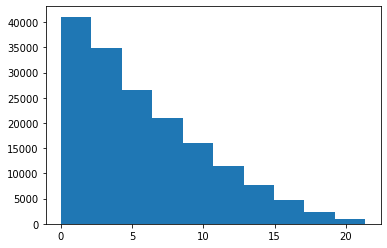

In [38]:
plt.hist(unshuffled[:,0])

(array([41062., 34806., 26520., 21036., 16087., 11451.,  7727.,  4642.,
         2249.,   853.]),
 array([ 0.       ,  2.1356165,  4.271233 ,  6.4068494,  8.542466 ,
        10.678082 , 12.813699 , 14.949315 , 17.084932 , 19.220549 ,
        21.356165 ], dtype=float32),
 <BarContainer object of 10 artists>)

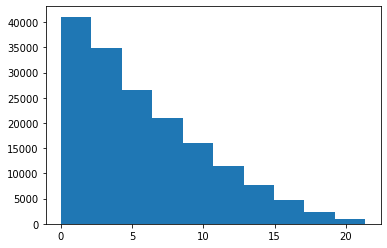

In [39]:
plt.hist(shuffled[:,0])

<AxesSubplot:xlabel='timeline'>

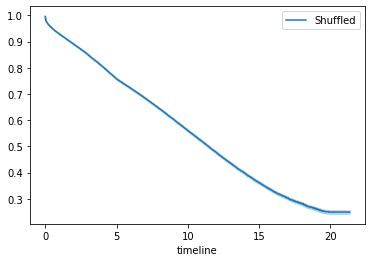

In [43]:
kmf = KaplanMeierFitter(label="Shuffled")
kmf.fit(durations=shuffled[:,0], event_observed=shuffled[:,1])
kmf.plot()

<AxesSubplot:xlabel='timeline'>

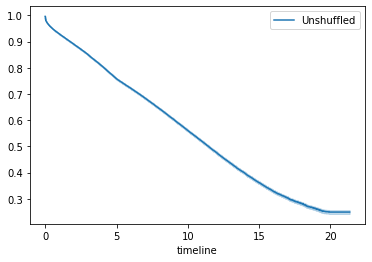

In [44]:
kmf = KaplanMeierFitter(label="Unshuffled")
kmf.fit(durations=unshuffled[:,0], event_observed=unshuffled[:,1])
kmf.plot()